In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data/college-majors/percent-bachelors-degrees-women-usa.csv')

In [3]:
data.head()

Year  Agriculture  Architecture  Art and Performance    Biology   Business  \
0  1970     4.229798     11.921005                 59.7  29.088363   9.064439   
1  1971     5.452797     12.003106                 59.9  29.394403   9.503187   
2  1972     7.420710     13.214594                 60.4  29.810221  10.558962   
3  1973     9.653602     14.791613                 60.2  31.147915  12.804602   
4  1974    14.074623     17.444688                 61.9  32.996183  16.204850   

   Communications and Journalism  Computer Science  Education  Engineering  \
0                           35.3              13.6  74.535328          0.8   
1                           35.5              13.6  74.149204          1.0   
2                           36.6              14.9  73.554520          1.2   
3                           38.4              16.4  73.501814          1.6   
4                           40.5              18.9  73.336811          2.2   

     English  Foreign Languages  Health Professions  Math and Statistics  \
0  65.570923               73.8                77.1                 38.0   
1  64.556485               73.9                75.5                 39.0   
2  63.664263               74.6                76.9                 40.2   
3  62.941502               74.9                77.4                 40.9   
4  62.413412               75.3                77.9                 41.8   

   Physical Sciences  Psychology  Public Administration  \
0               13.8        44.4                   68.4   
1               14.9        46.2                   65.5   
2               14.8        47.6                   62.6   
3               16.5        50.4                   64.3   
4               18.2        52.6                   66.1   

   Social Sciences and History  
0                         36.8  
1                         36.2  
2                         36.1  
3                         36.4  
4                         37.3

In [4]:
data.dtypes

Year                               int64
Agriculture                      float64
Architecture                     float64
Art and Performance              float64
Biology                          float64
Business                         float64
Communications and Journalism    float64
Computer Science                 float64
Education                        float64
Engineering                      float64
English                          float64
Foreign Languages                float64
Health Professions               float64
Math and Statistics              float64
Physical Sciences                float64
Psychology                       float64
Public Administration            float64
Social Sciences and History      float64
dtype: object

In [5]:
stem_majors = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics', 'Physical Sciences', 'Psychology']

In [16]:
stem_data = data[stem_majors]
stem_data = pd.concat([stem_data, data['Year']], axis=1)
stem_data.set_index("Year", inplace=True)

In [26]:
last_gap_value = stem_data.iloc[-1]
men_values = 100 - last_gap_value

In [33]:
sorted_majors = abs(men_values - last_gap_value).sort_values(ascending=False).index.tolist()

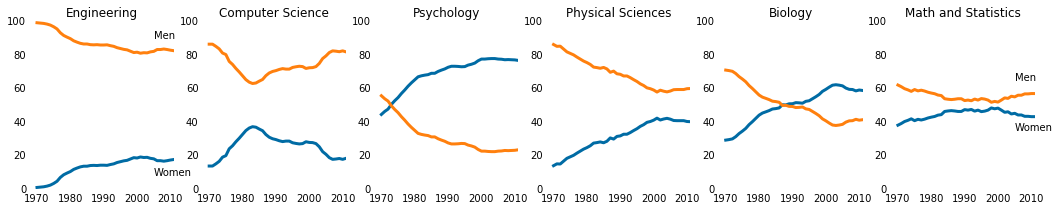

In [43]:
# plot the trends across all majors from 1968 to 2011
fig = plt.figure(figsize=(18, 3))
dark_blue = np.array([0, 107, 164]) / 255
orange = np.array([255, 128, 14]) / 255

for i, major in enumerate(sorted_majors):
    ax = fig.add_subplot(1, 6, i+1)
    women_data = stem_data[major]
    men_data = 100 - women_data
    year_data = stem_data.index
    ax.plot(year_data, women_data, c=tuple(dark_blue), linewidth=3)
    ax.plot(year_data, men_data, c=tuple(orange), linewidth=3)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    ax.set_title(major)
    
    spines = ax.spines
    spines['bottom'].set_visible(False)
    spines['top'].set_visible(False)
    spines['left'].set_visible(False)
    spines['right'].set_visible(False)
    
    ax.tick_params(top='off', left='off', right='off', bottom='off')
    
    if i == 0:
        ax.text(2005, 90, "Men")
        ax.text(2005, 8, "Women")
    elif i == 5:
        ax.text(2005, 65, "Men")
        ax.text(2005, 35, "Women")
        
plt.show()

In [44]:
data.set_index('Year', inplace=True)
data.shape

(42, 17)

In [55]:
# There are 17 majors total with data over 42 years
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

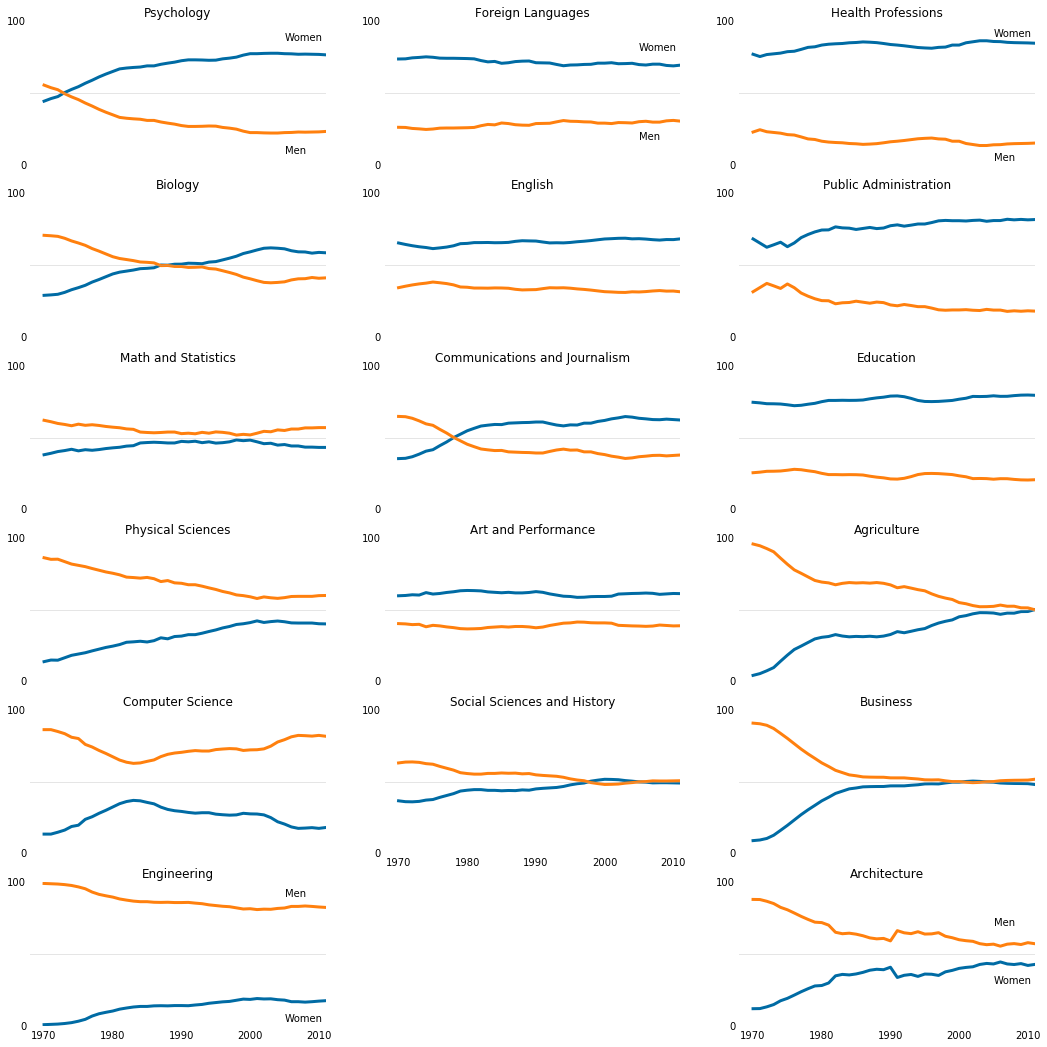

In [79]:
# Generate a 6 row by 3 column grid of subplots
fig = plt.figure(figsize=(18, 18))
all_majors = [stem_cats, lib_arts_cats, other_cats]

annot_pos = {1: [(2005, 87, "Women"), (2005, 8, "Men")], 2: [(2005, 80, "Women"), (2005, 18, "Men")], 
             3: [(2005, 90, "Women"), (2005, 3, "Men")], 16: [(2005, 90, "Men"), (2005, 3, "Women")],
             18: [(2005, 70, "Men"), (2005, 30, "Women")]}

for i, major_categ in enumerate(all_majors):
    pos = i + 1
    for major in major_categ:
        ax = fig.add_subplot(6, 3, pos)
        
        women_data = data[major]
        men_data = 100 - women_data
        year_data = data.index
        
        ax.plot(year_data, women_data, c=dark_blue, linewidth=3)
        ax.plot(year_data, men_data, c=orange, linewidth=3)
        ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
        
        ax.set_xlim(1968, 2011)
        ax.set_ylim(0, 100)
        ax.set_yticks([0, 100])
        ax.set_title(major)
        
        ax.tick_params(top='off', bottom='off', left='off', right='off')
        spines = ax.spines
        spines['top'].set_visible(False)
        spines['left'].set_visible(False)
        spines['right'].set_visible(False)
        spines['bottom'].set_visible(False)
        
        
        annots = annot_pos.get(pos, None)
        if annots:
            for annot in annots:
                ax.text(*annot)
        pos += 3
        
        if major != major_categ[-1]:
            ax.tick_params(labelbottom='off')
plt.savefig('gender_degrees.png')    
plt.show()